In [1]:
#STEP 1: Load the Data.
import pandas as pd

# Load the dataset
file_path ="/content/API_SP.POP.TOTL_DS2_en_csv_v2_19373.csv"
data = pd.read_csv(file_path, skiprows=4)  # Skip the first 4 rows which usually contain metadata

# Display the first few rows of the dataset
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN,NaN


In [2]:
#STEP 2: Inspect the data

# Display the summary of the dataset
print("\nSummary of the dataset:")
print(data.info())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe(include='all'))



Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            264 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            264 non-null    float64
 8   1964            264 non-null    float64
 9   1965            264 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973      

In [3]:
#Step 3: Clean the data

# 1. Remove the 'Unnamed: 68' column.
data = data.drop(columns=['Unnamed: 68'], errors='ignore')

# 2. Handle Missing Values

# Fill missing population values with the mean value for each year
years = [col for col in data.columns if col.isdigit()]
# Instead of filling with mean which can result in NaN if all values are NaN, fill with 0
data[years] = data[years].fillna(0)

# 3. Remove duplicates
data = data.drop_duplicates()

# 4. Standardize Data Types
# Convert year columns to integers
data[years] = data[years].astype(int)

# Verify the changes
print("Cleaned Data Summary:")
print(data.info())
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Save the cleaned data to a new CSV file
cleaned_file_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to {cleaned_file_path}")


data = pd.read_csv('cleaned_dataset.csv')

Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            266 non-null    int64  
 5   1961            266 non-null    int64  
 6   1962            266 non-null    int64  
 7   1963            266 non-null    int64  
 8   1964            266 non-null    int64  
 9   1965            266 non-null    int64  
 10  1966            266 non-null    int64  
 11  1967            266 non-null    int64  
 12  1968            266 non-null    int64  
 13  1969            266 non-null    int64  
 14  1970            266 non-null    int64  
 15  1971            266 non-null    int64  
 16  1972            266 non-null    int64  
 17  1973         

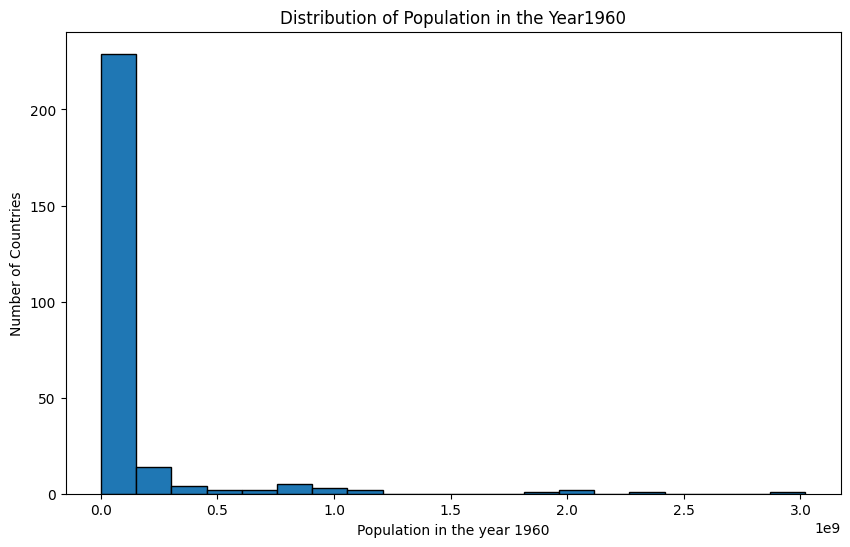

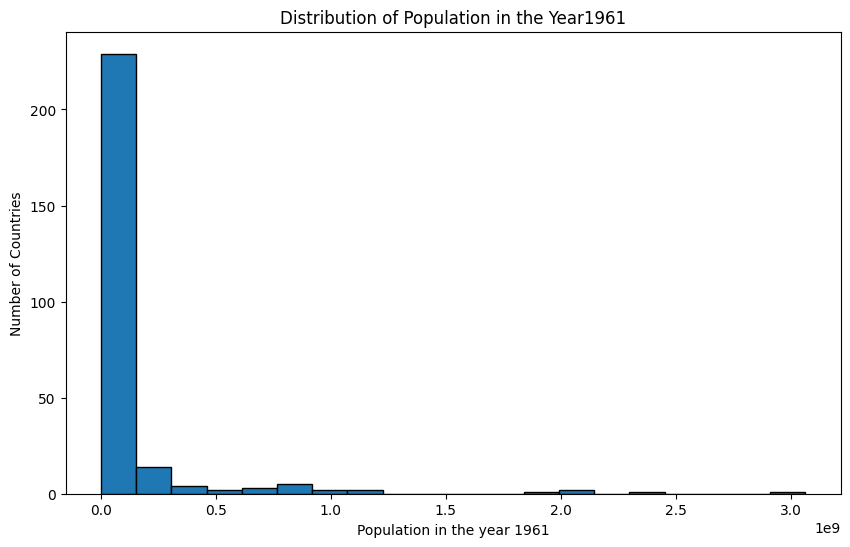

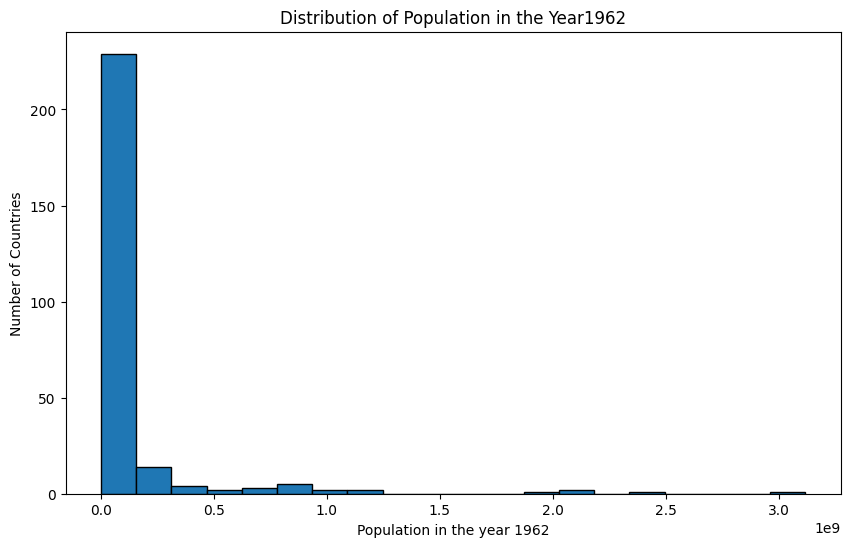

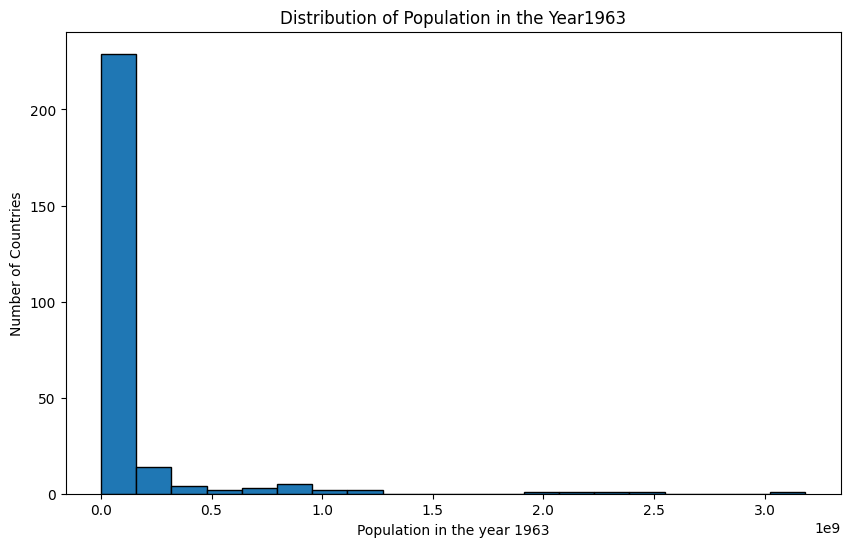

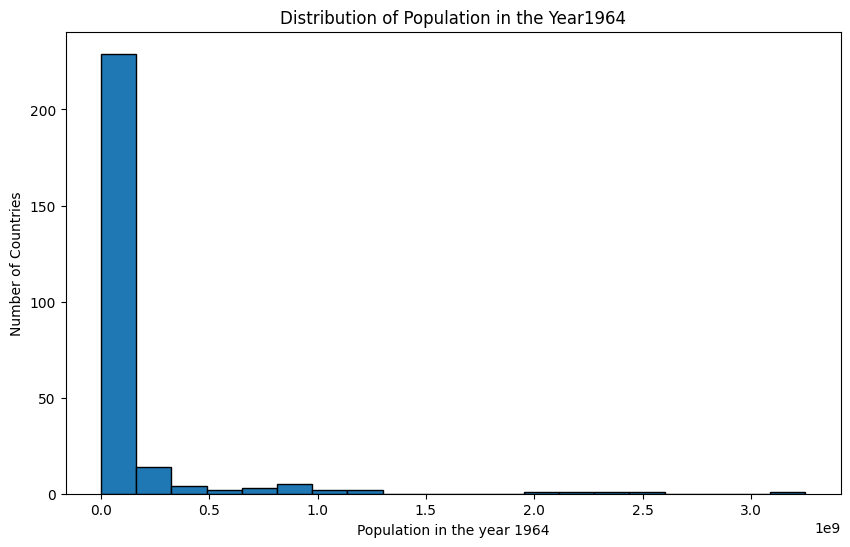

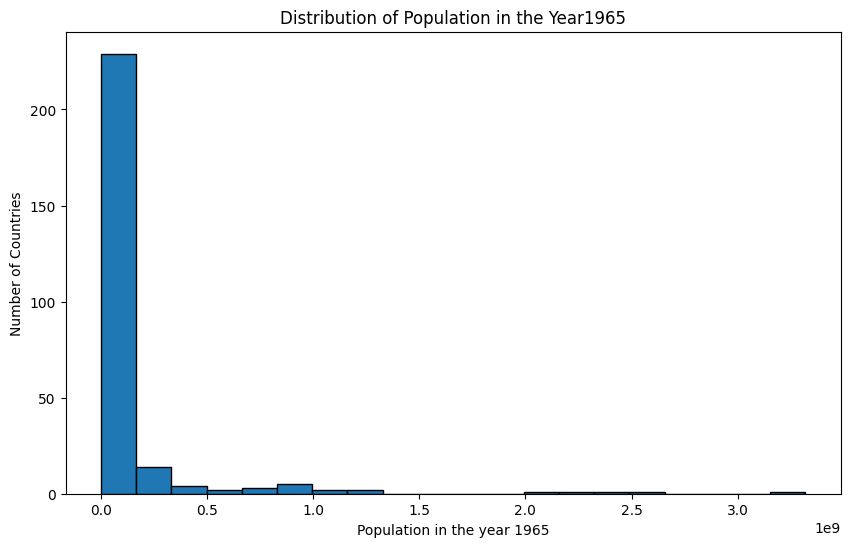

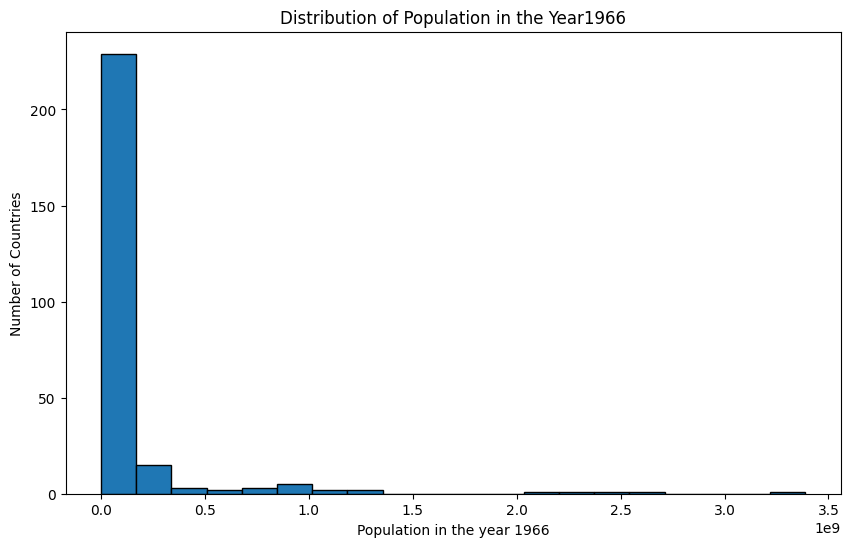

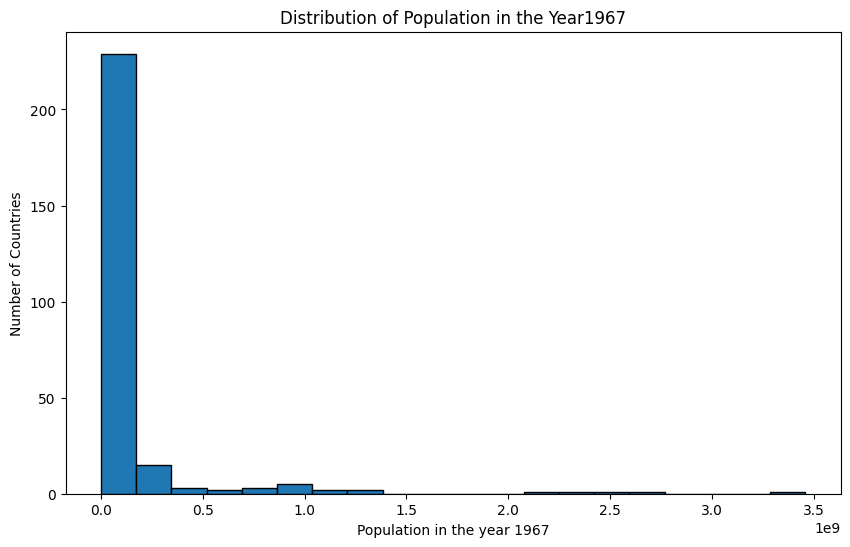

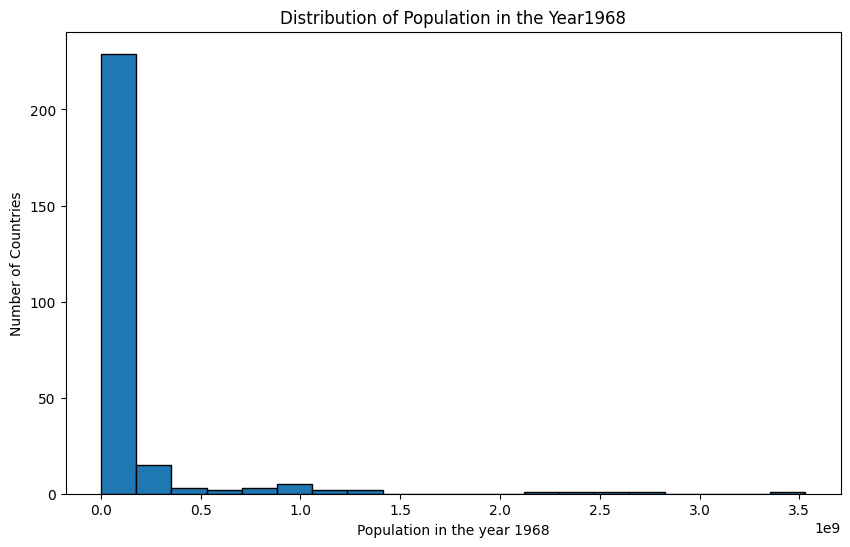

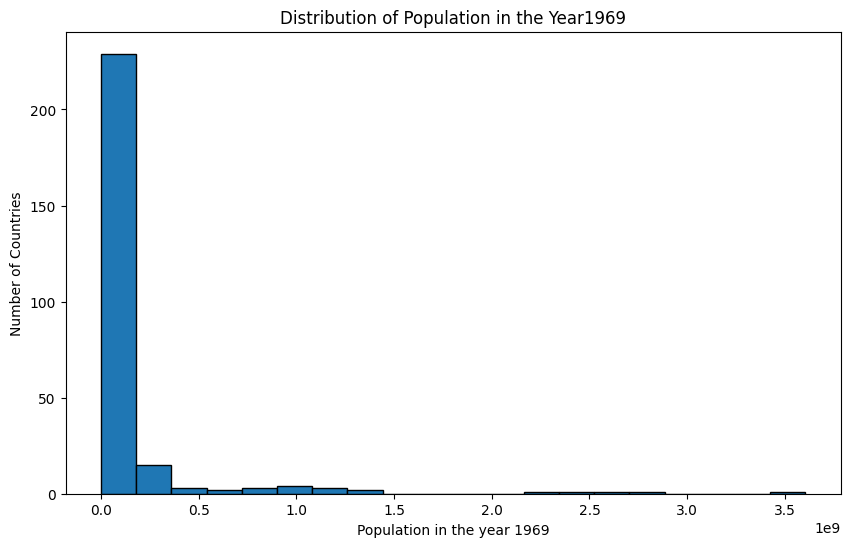

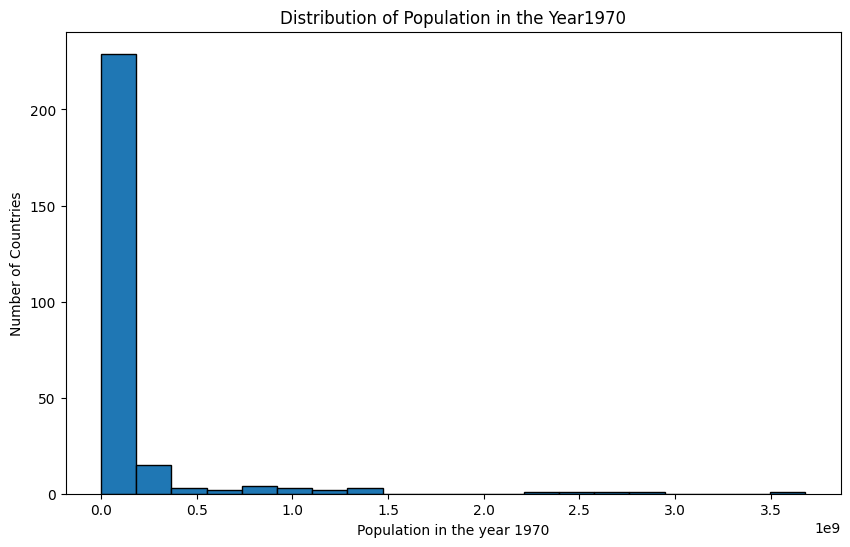

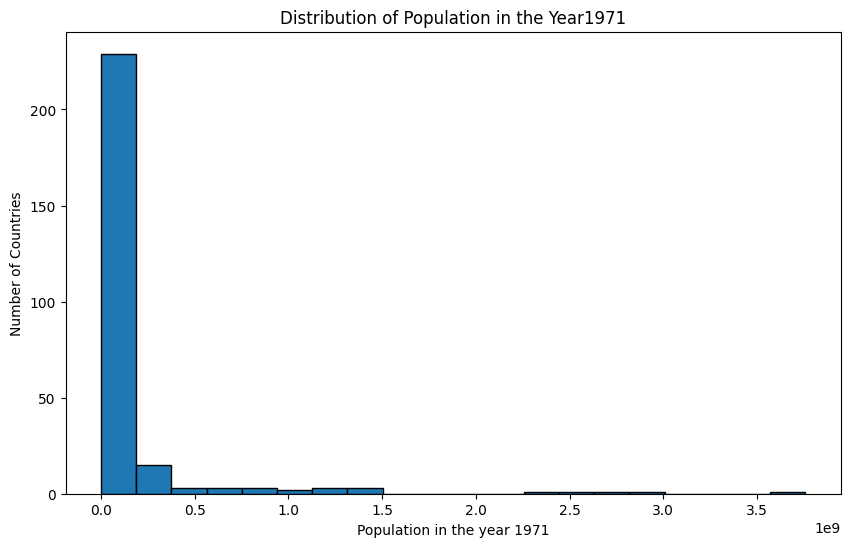

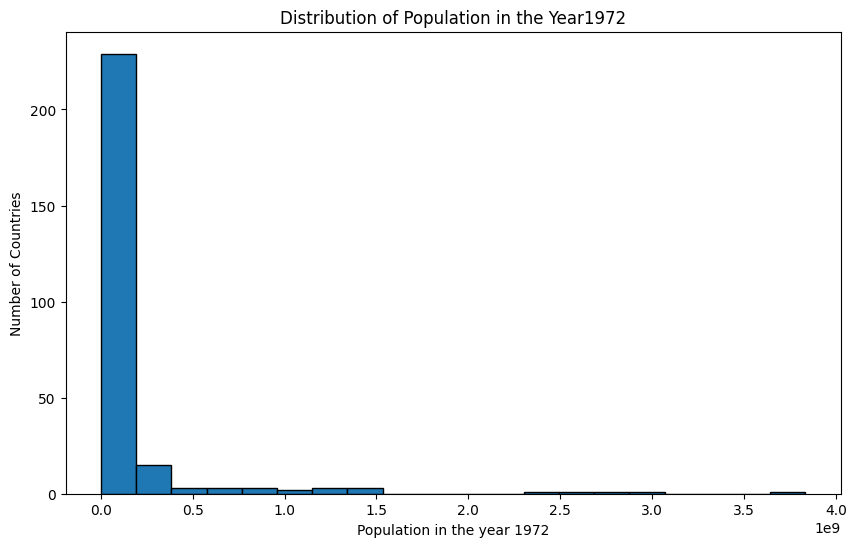

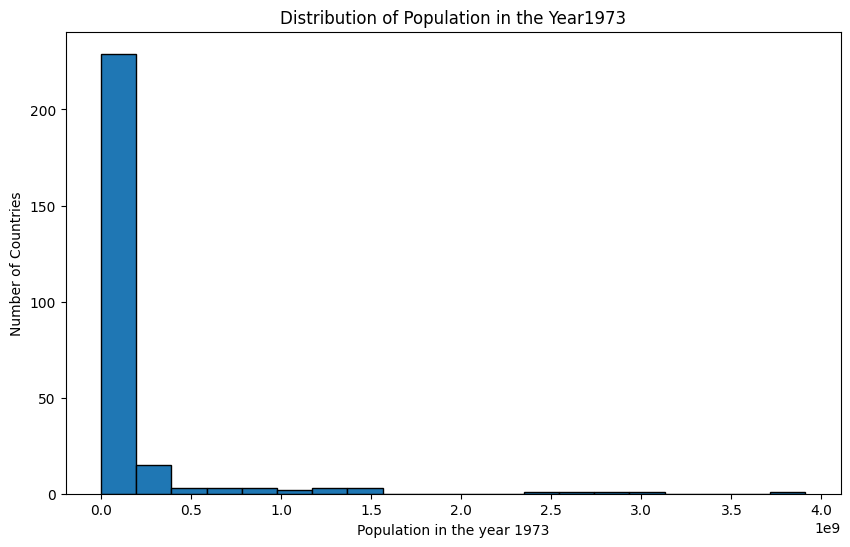

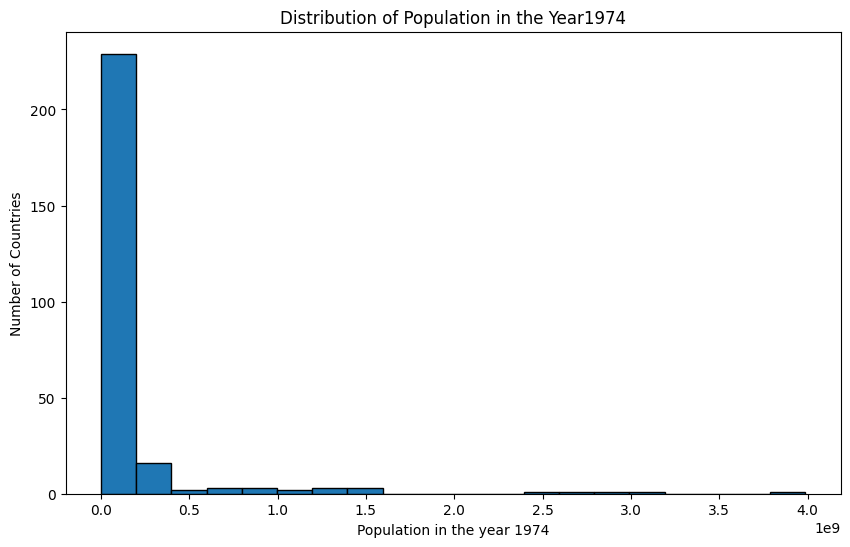

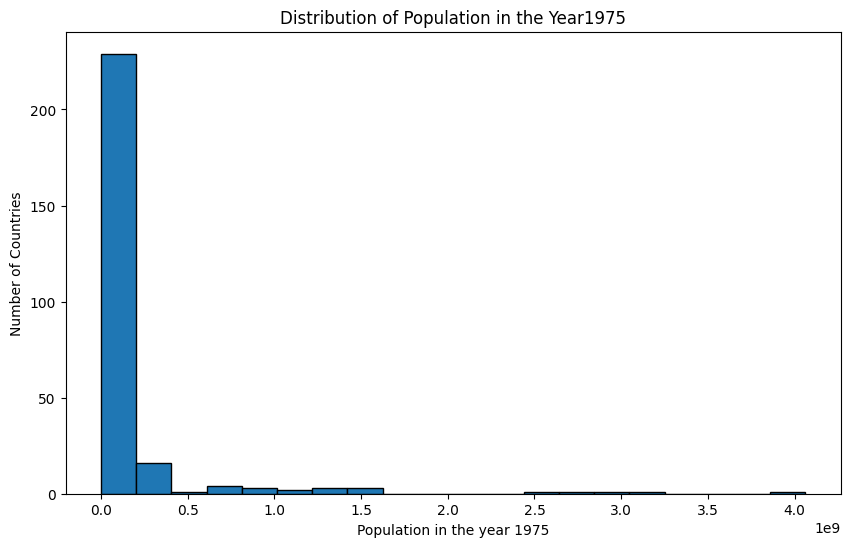

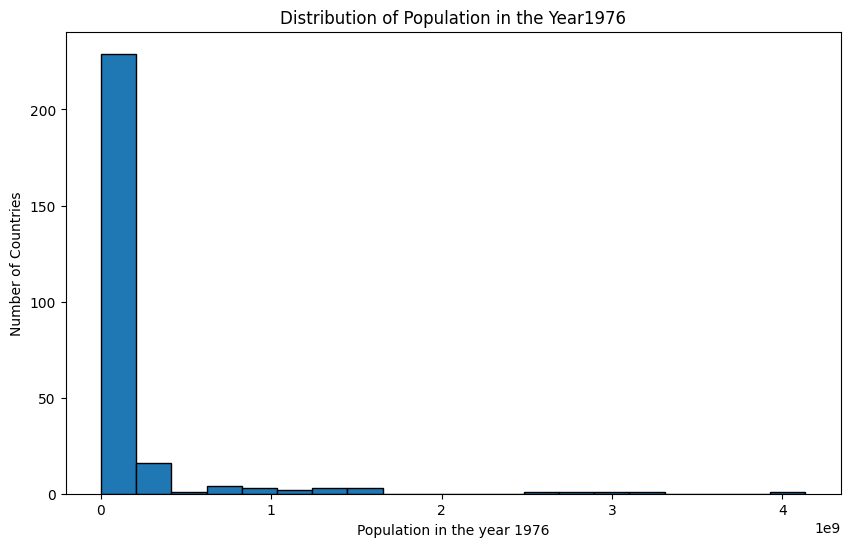

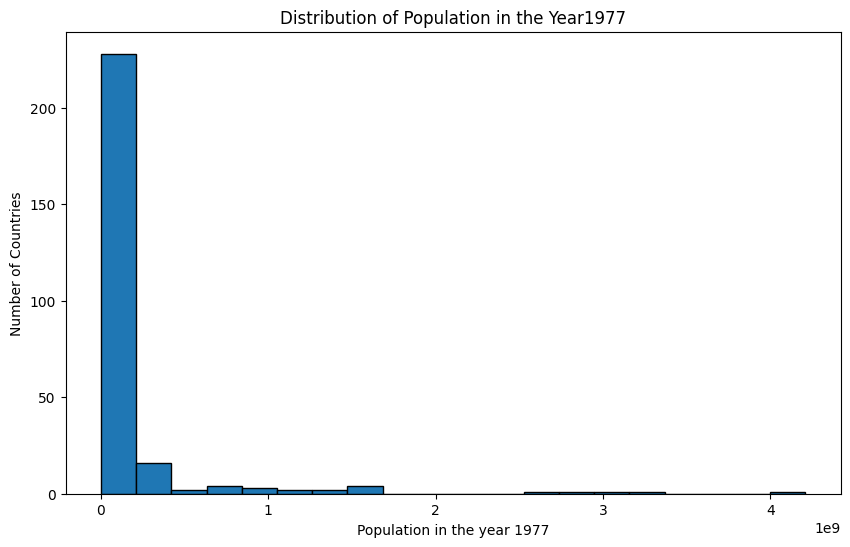

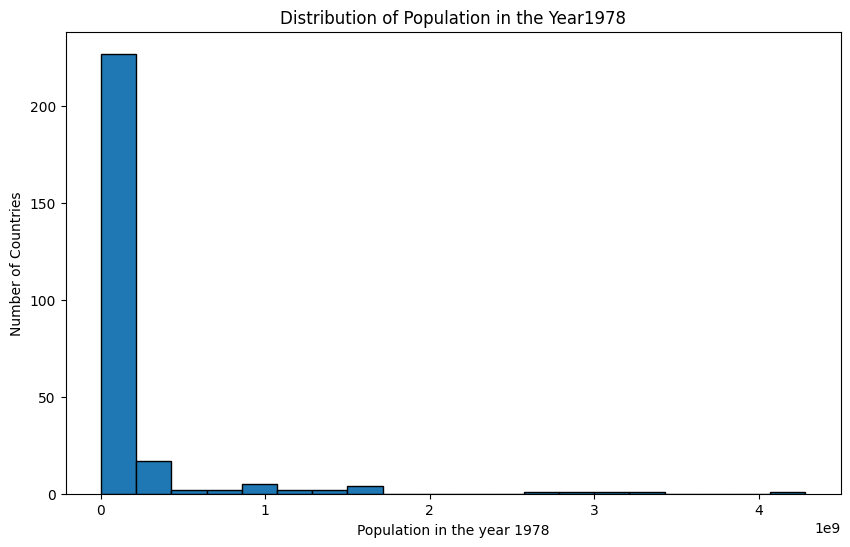

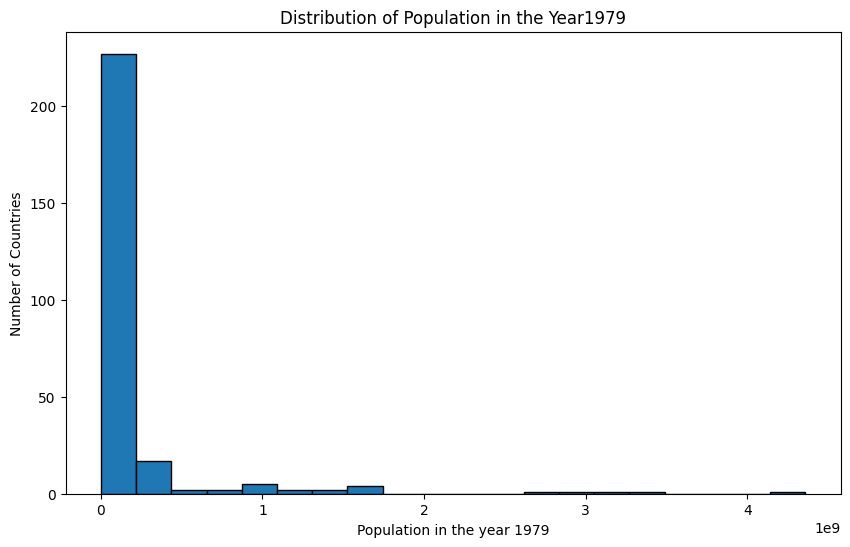

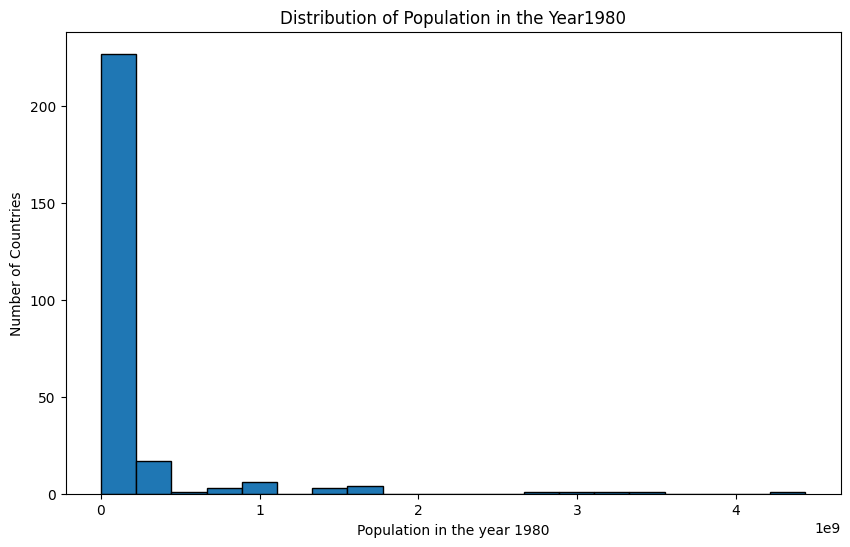

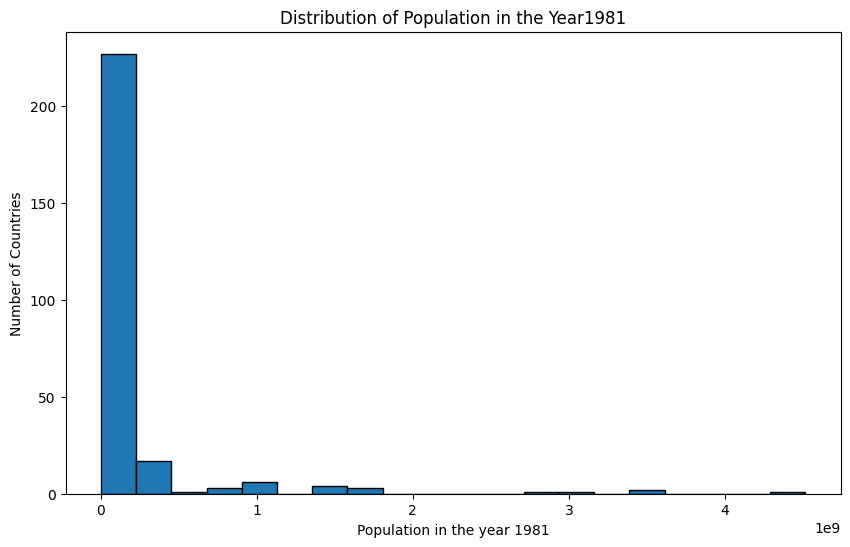

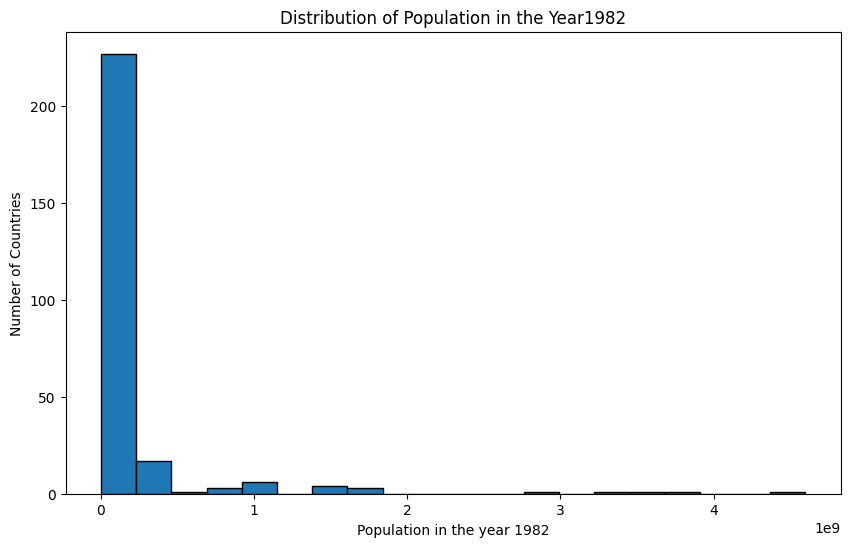

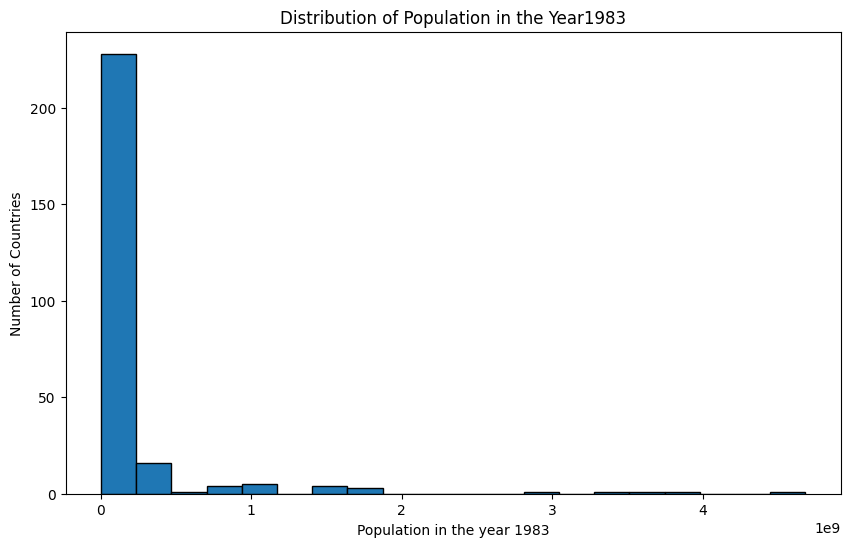

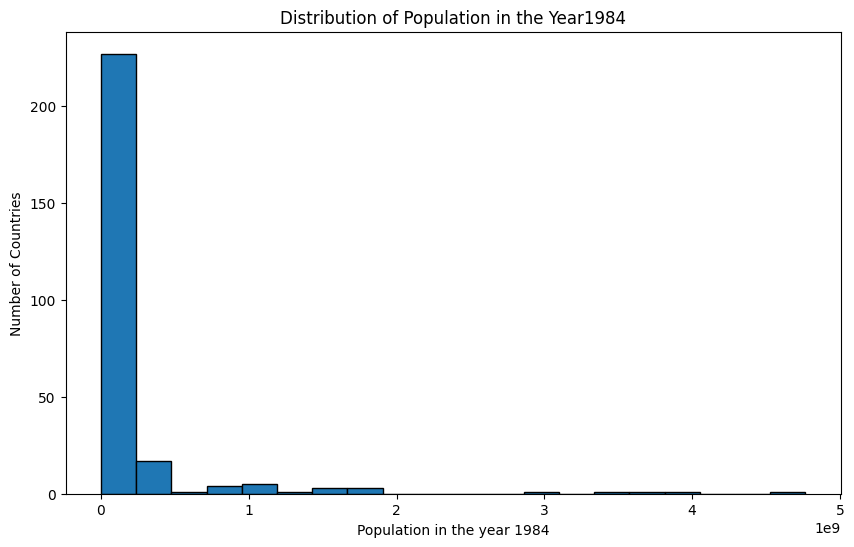

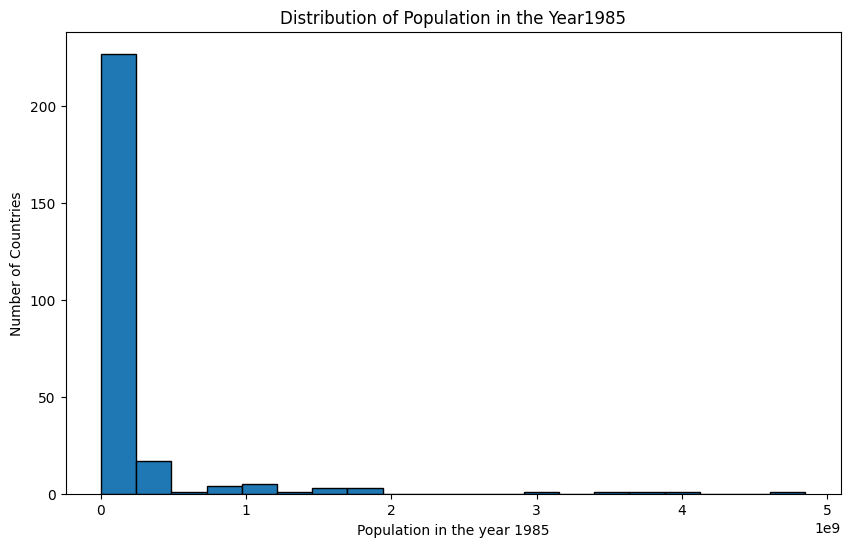

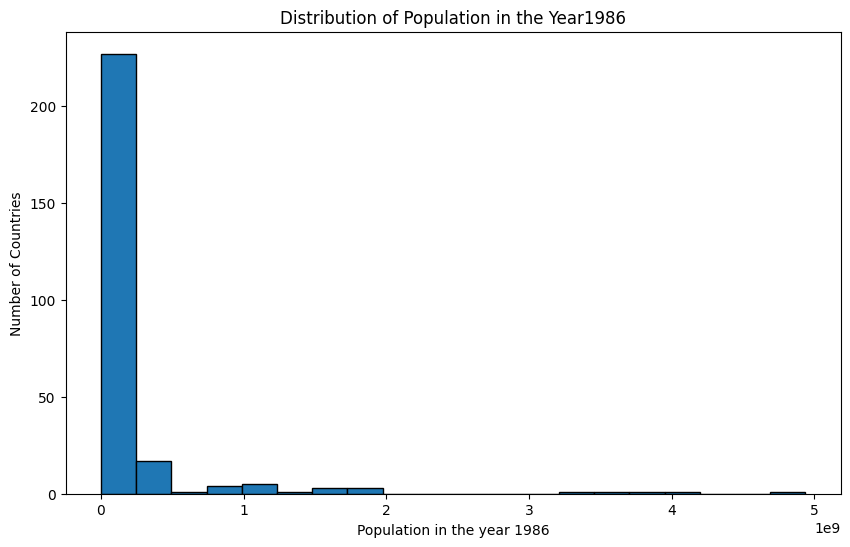

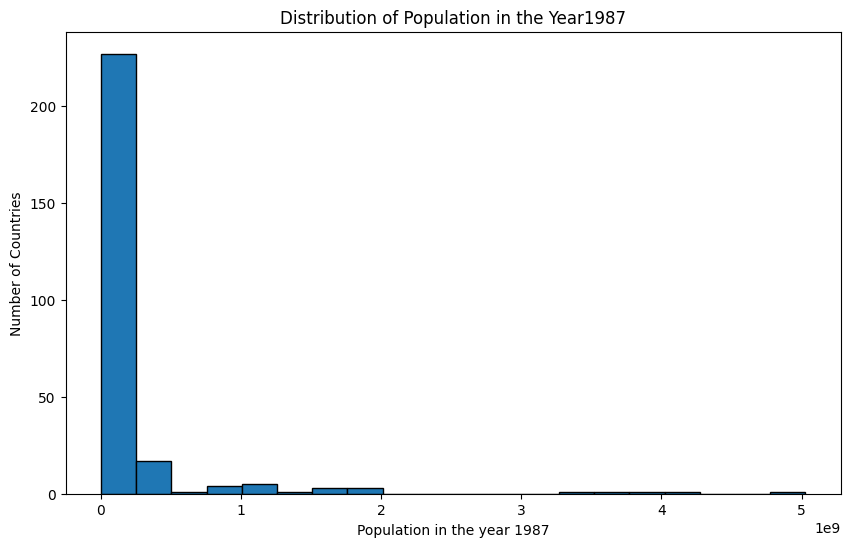

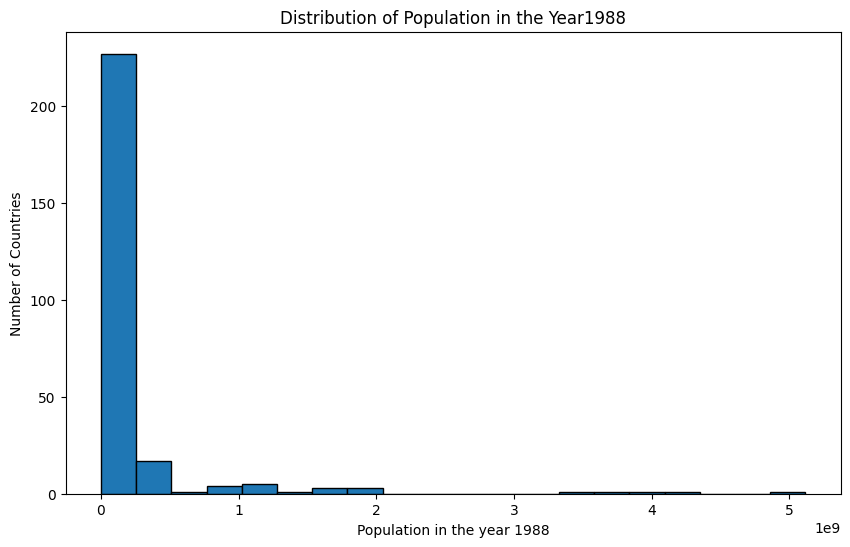

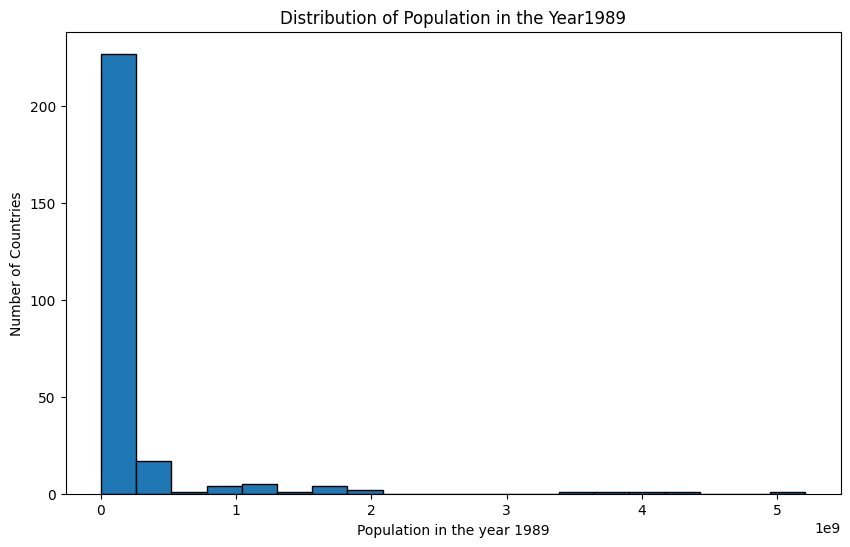

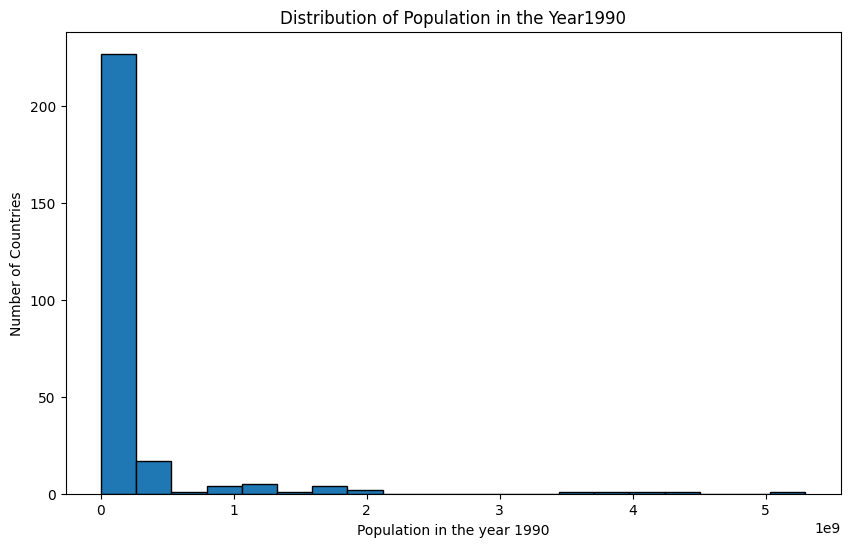

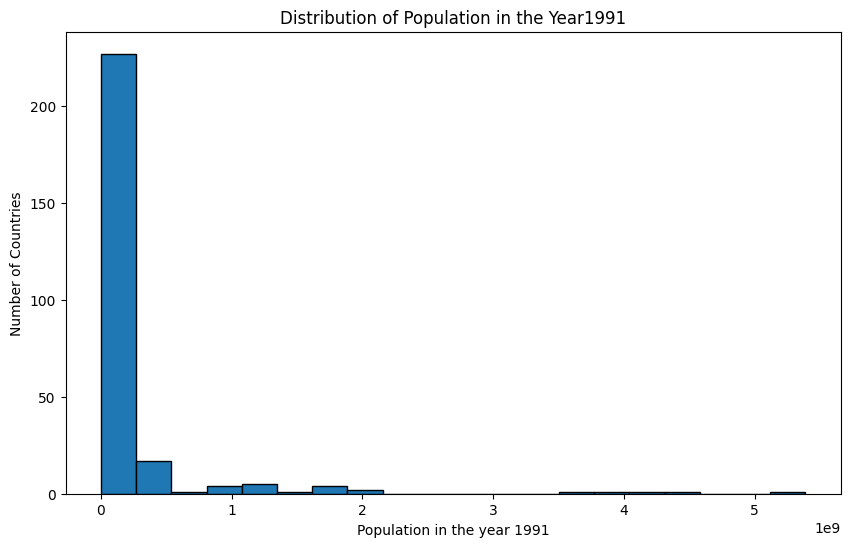

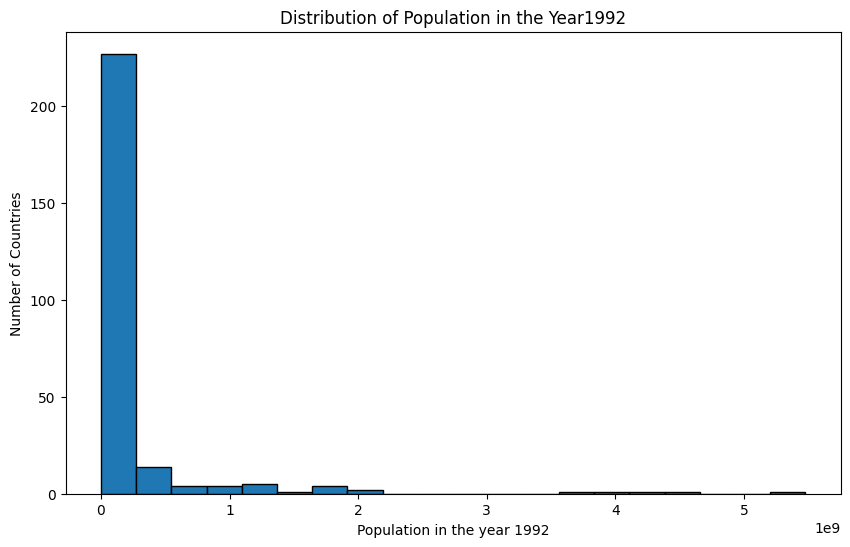

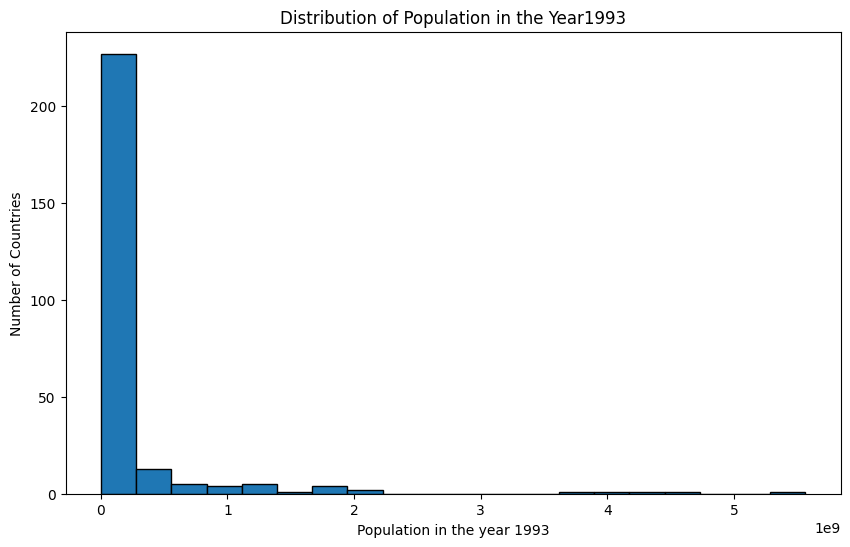

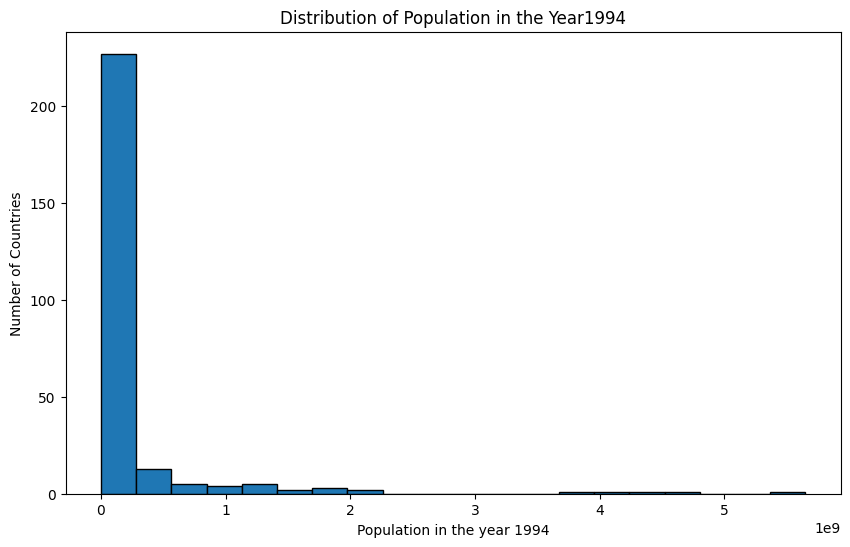

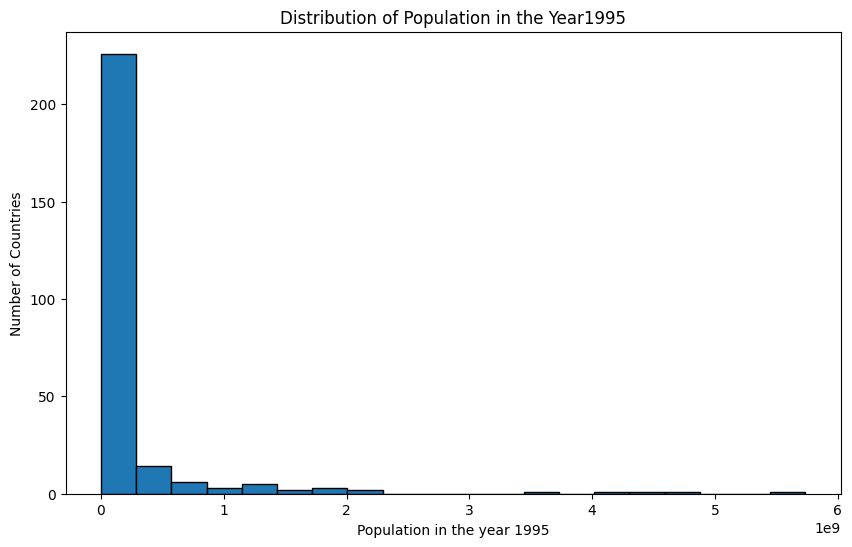

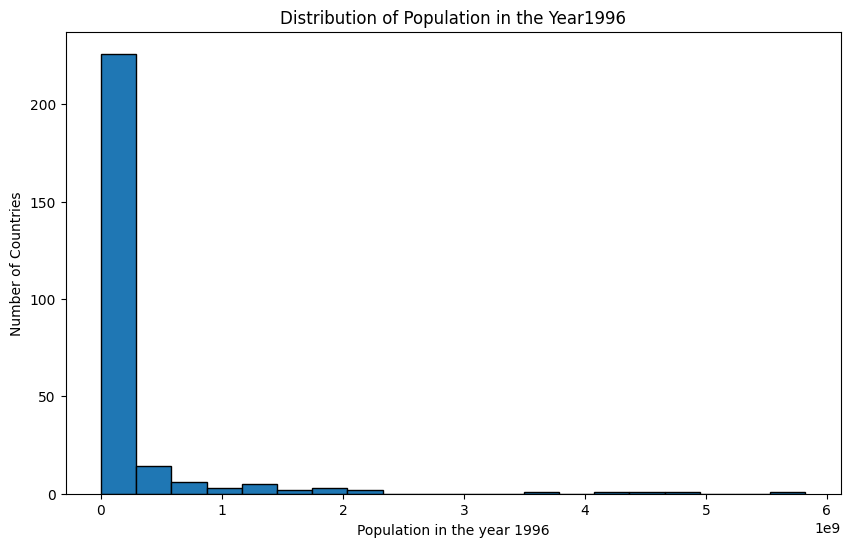

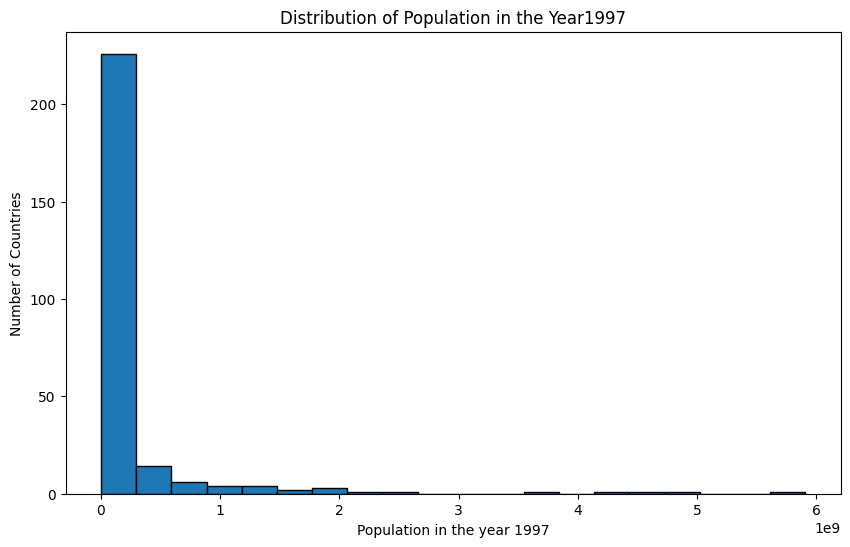

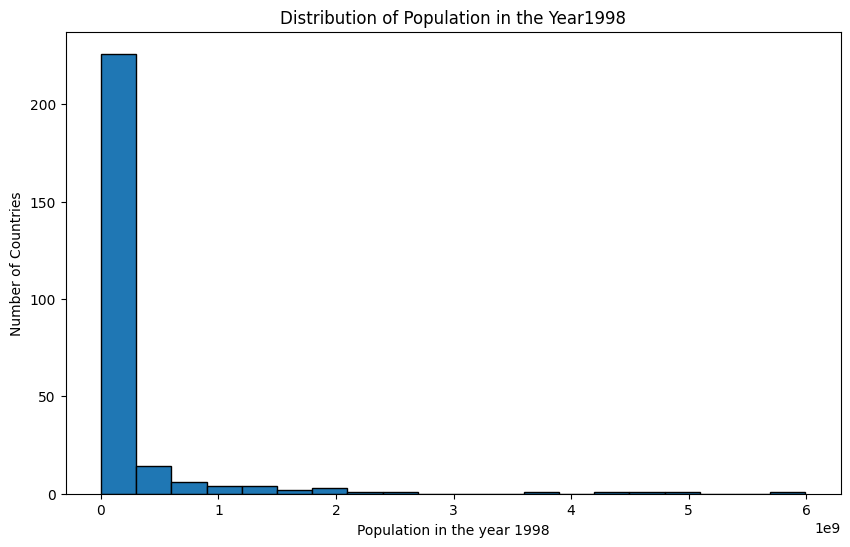

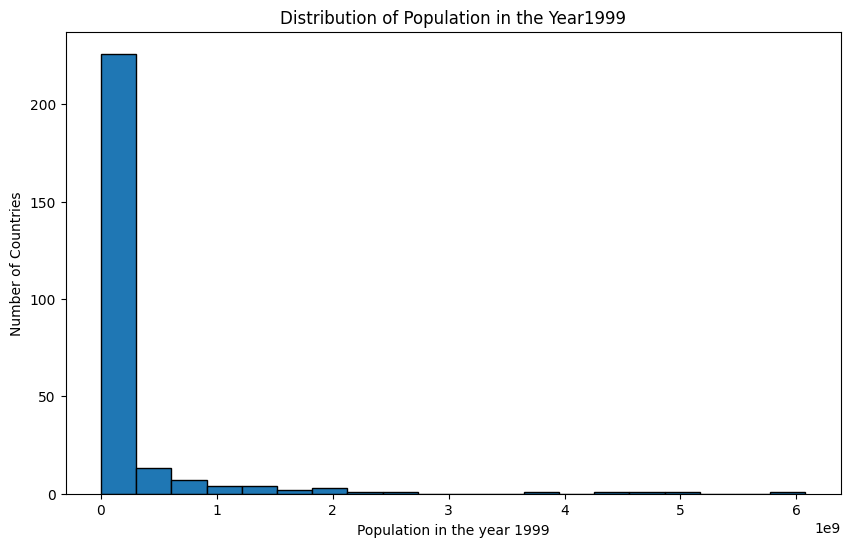

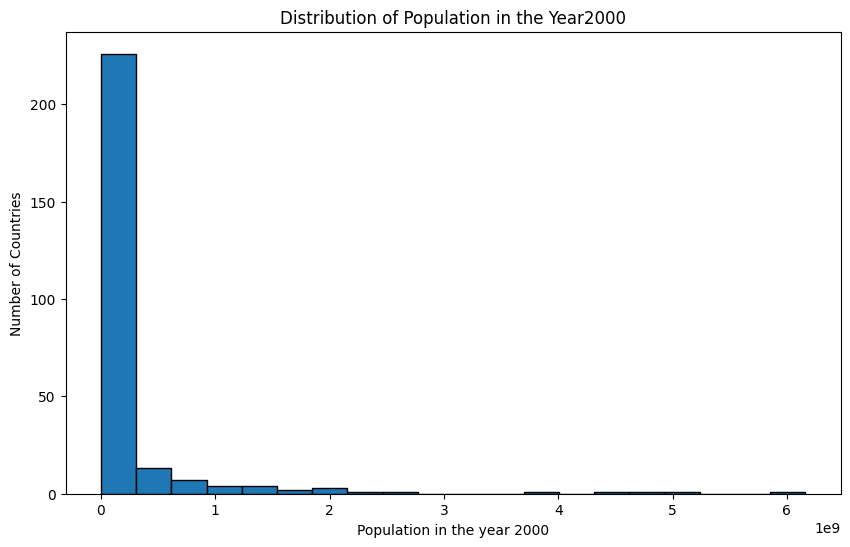

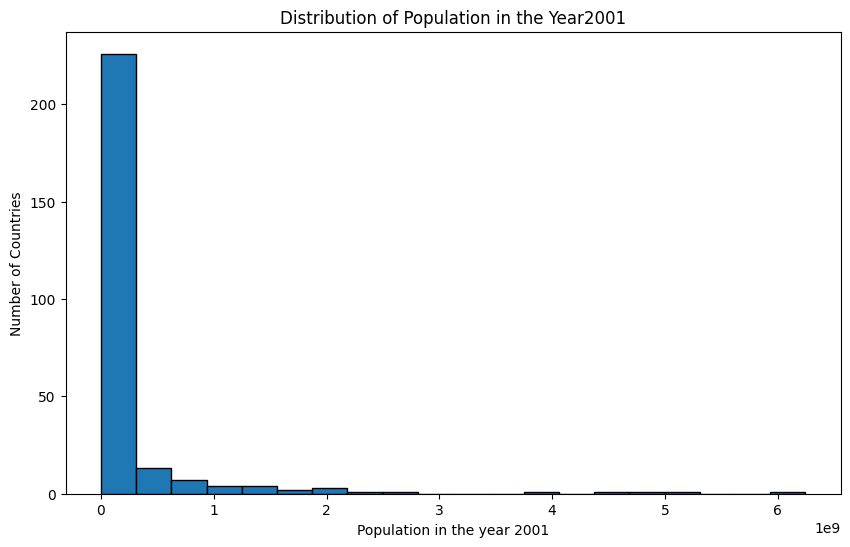

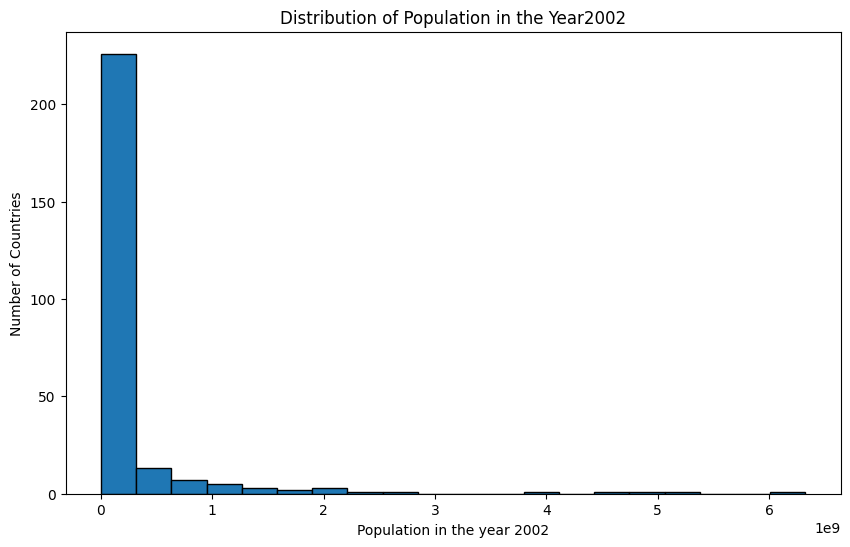

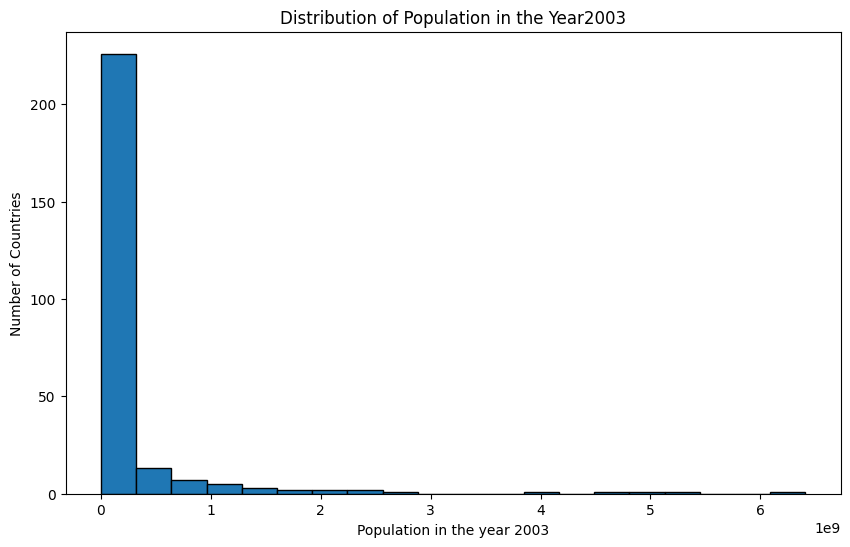

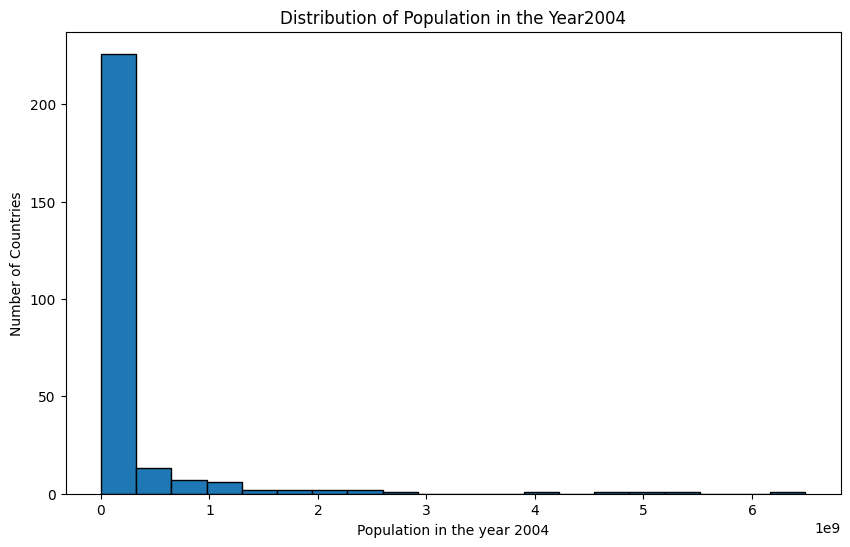

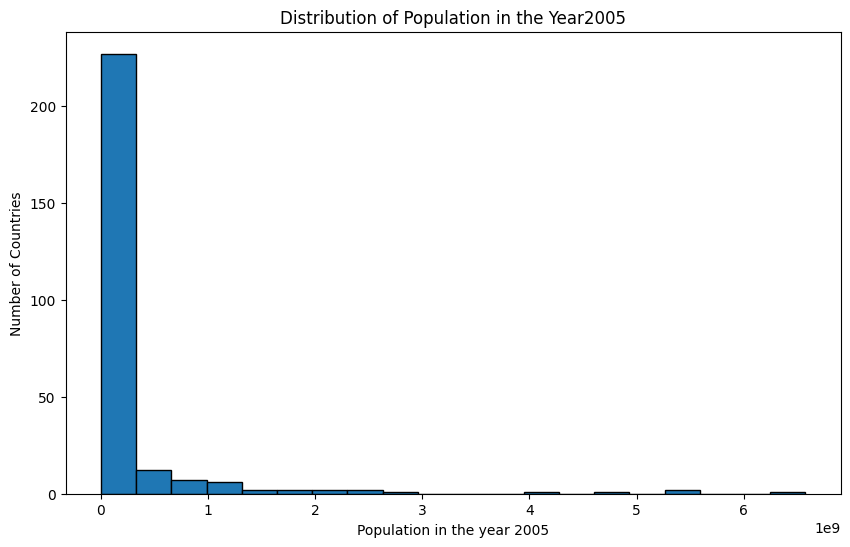

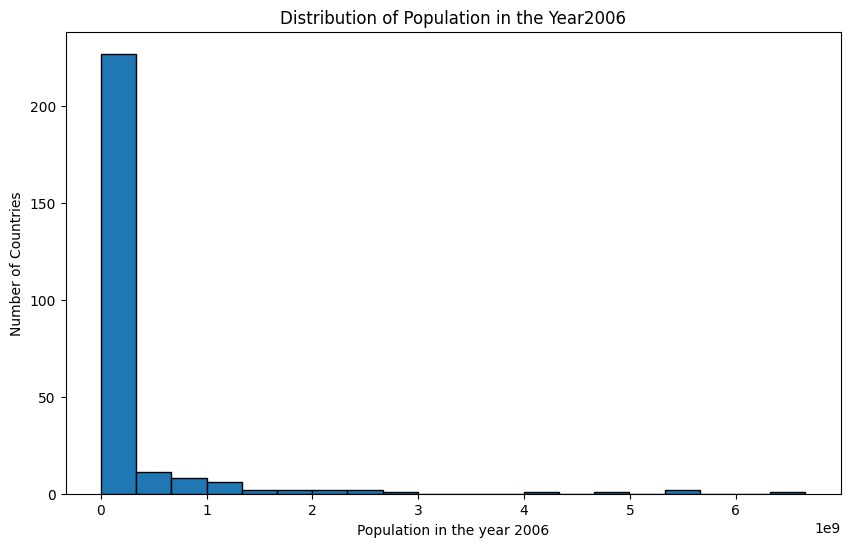

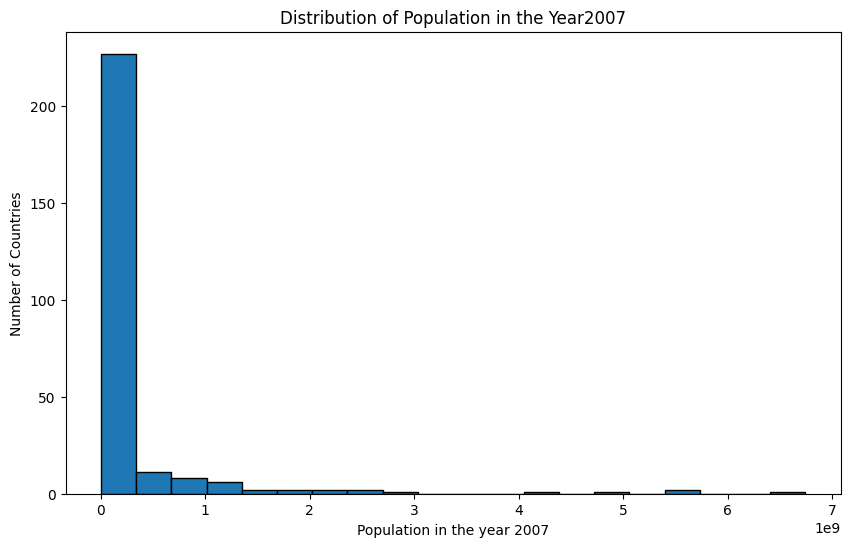

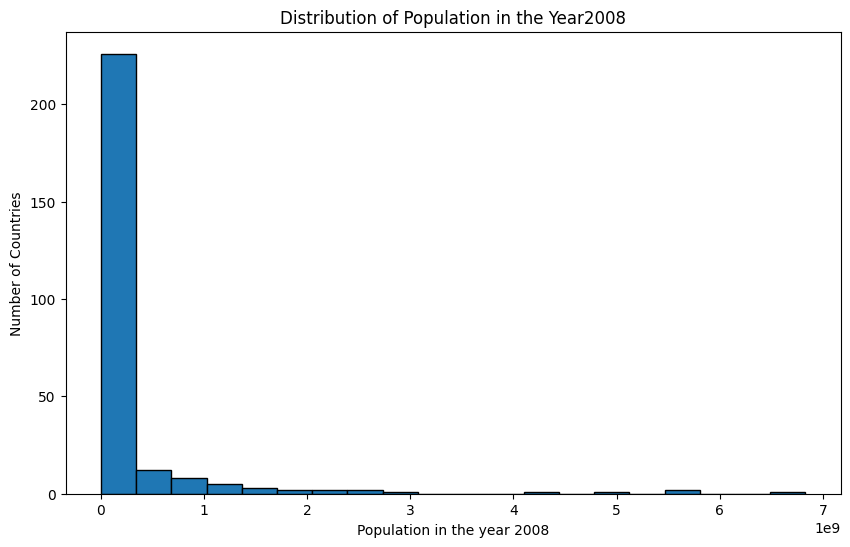

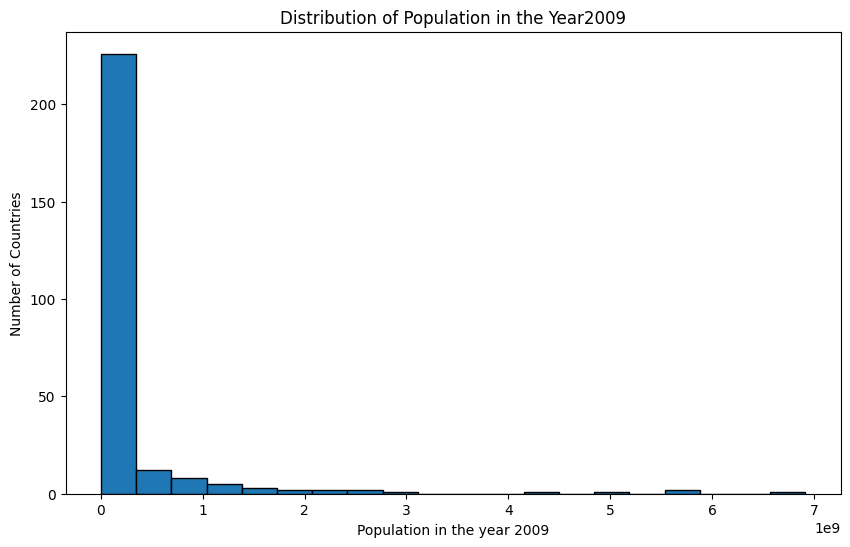

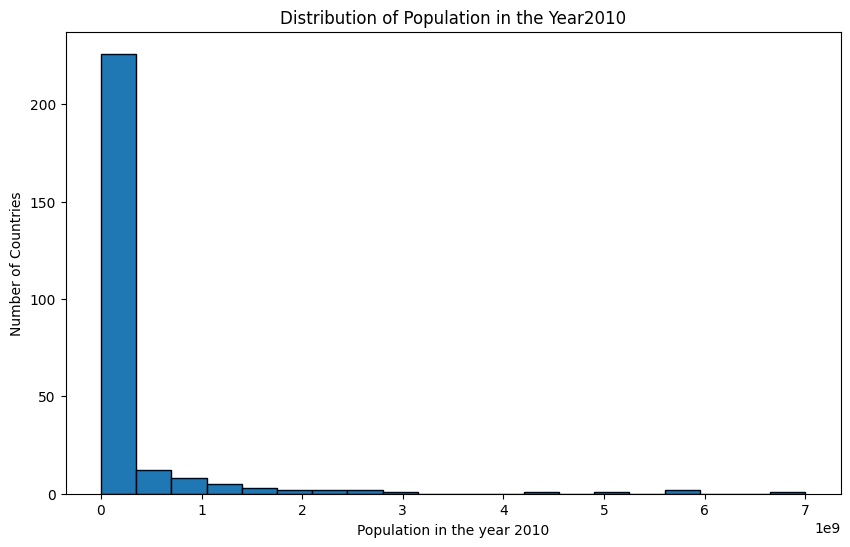

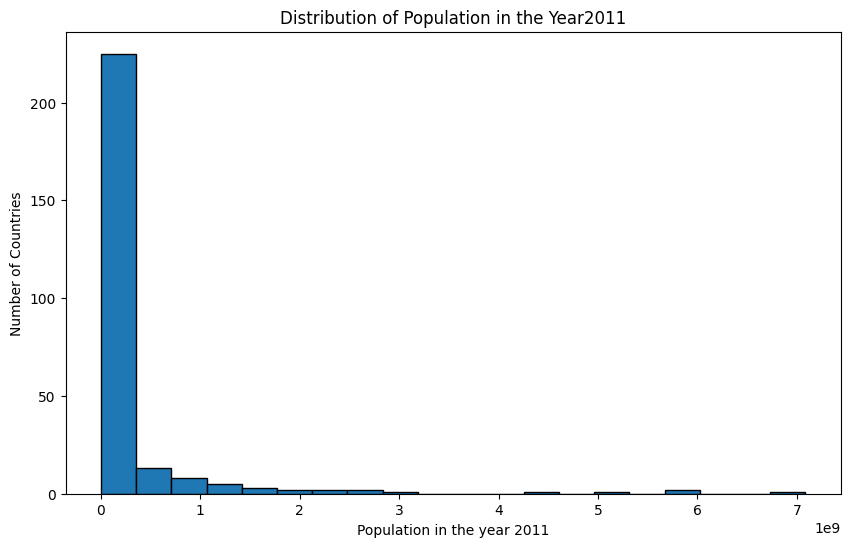

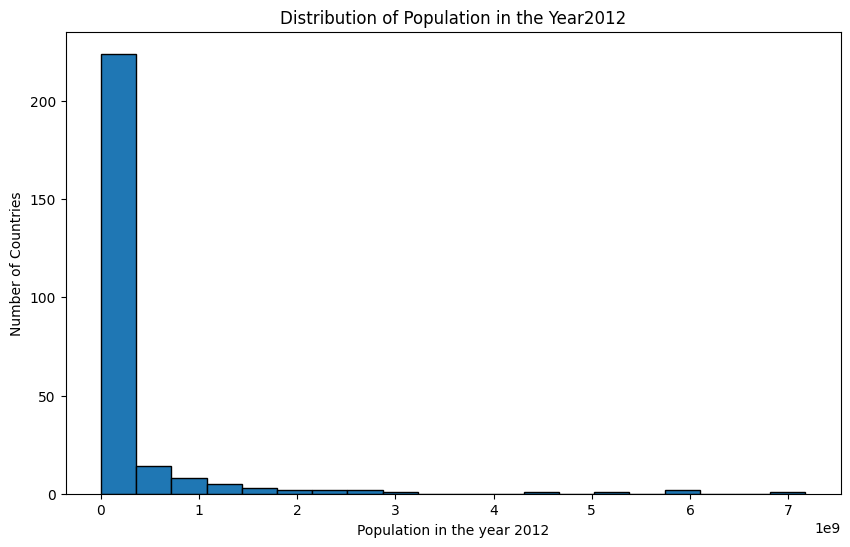

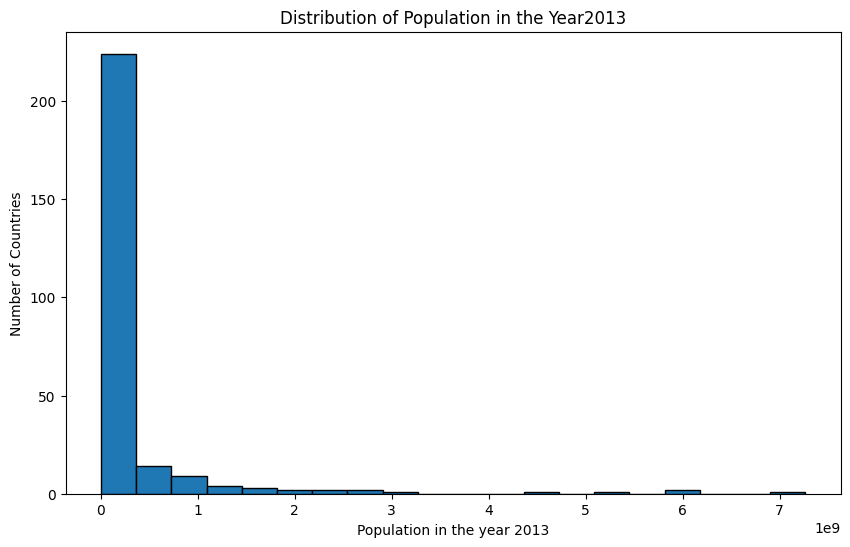

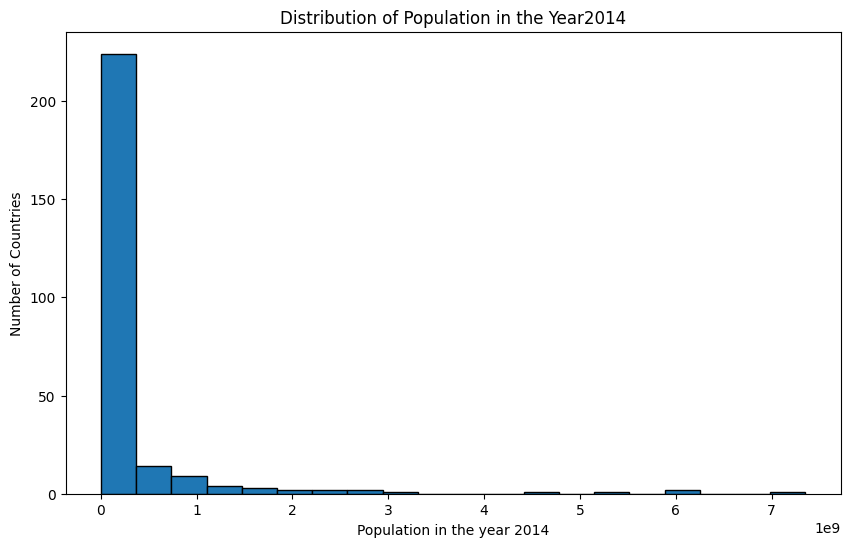

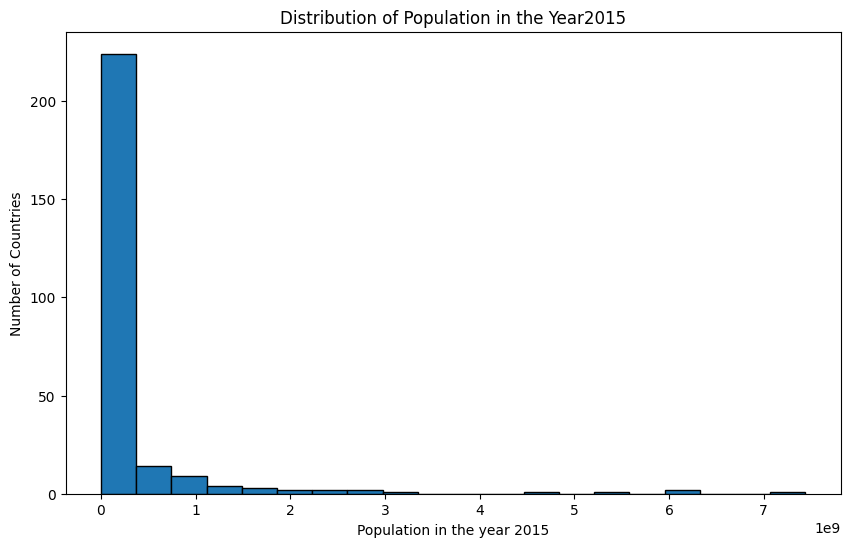

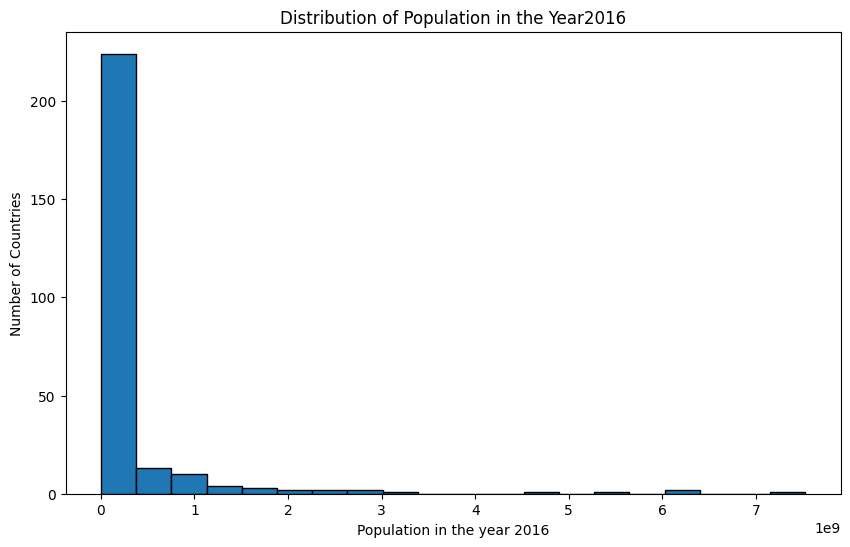

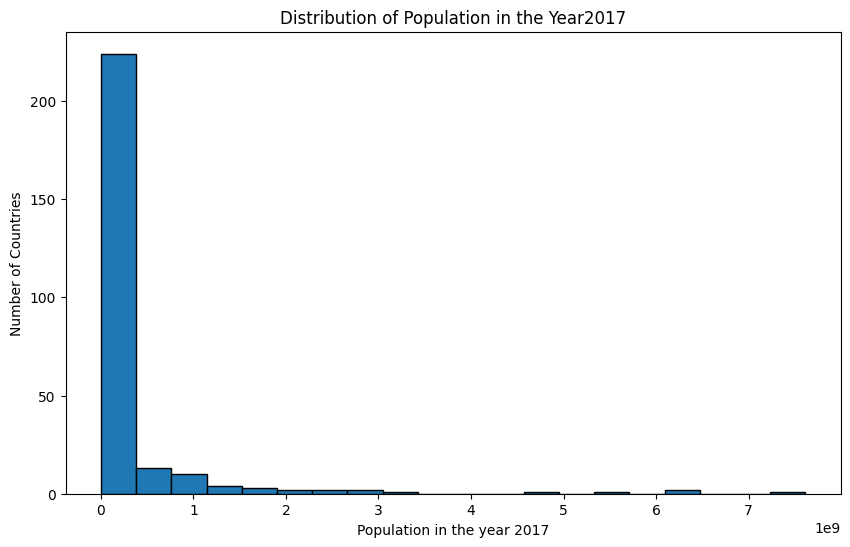

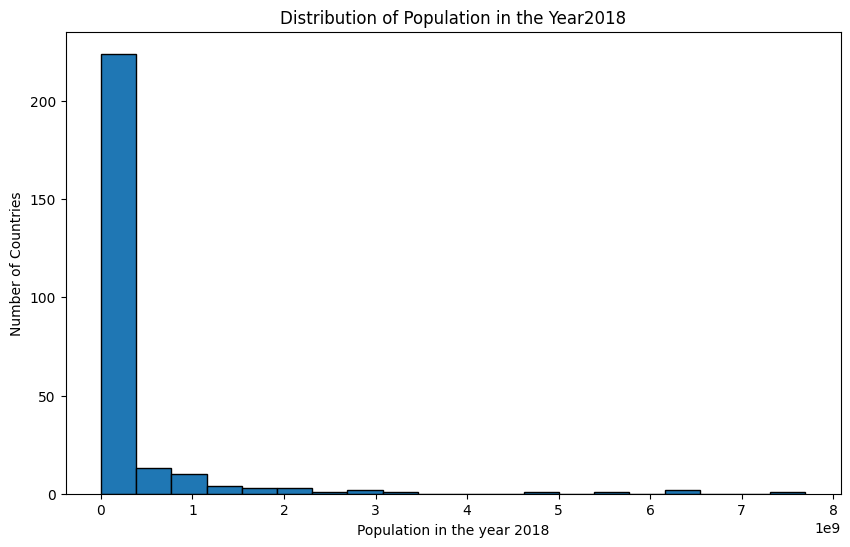

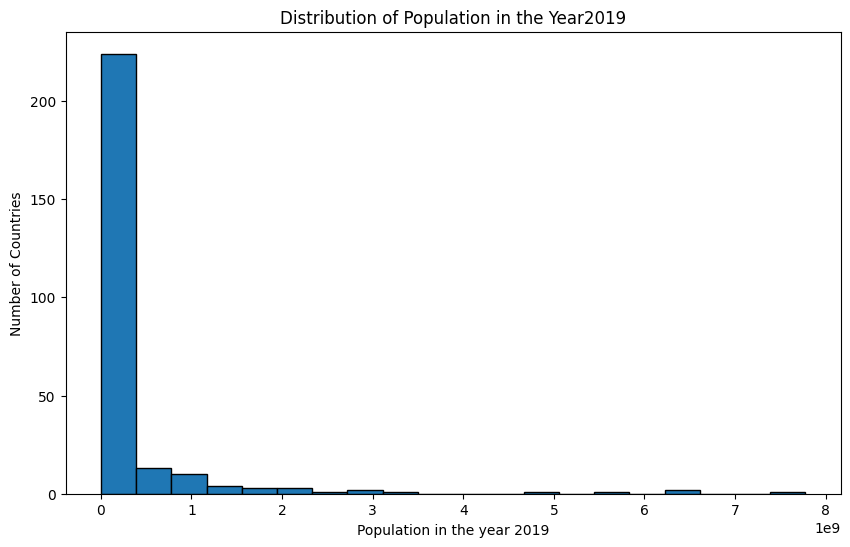

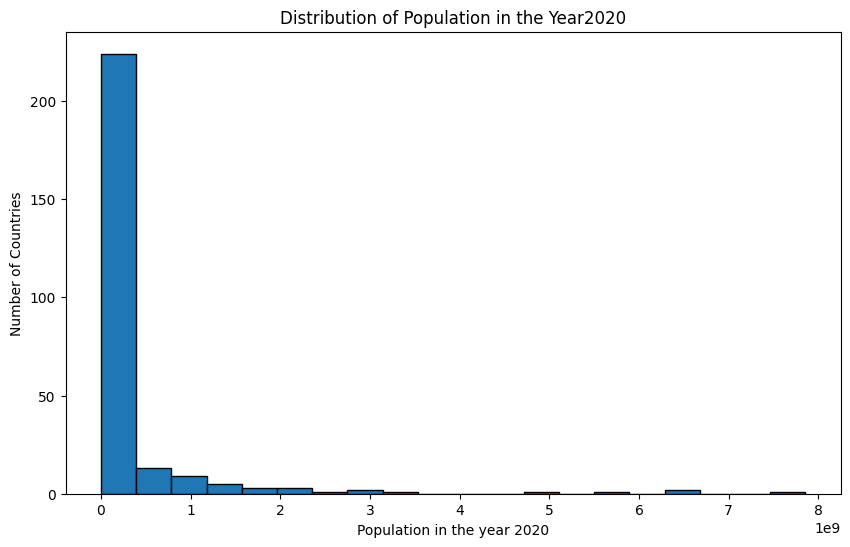

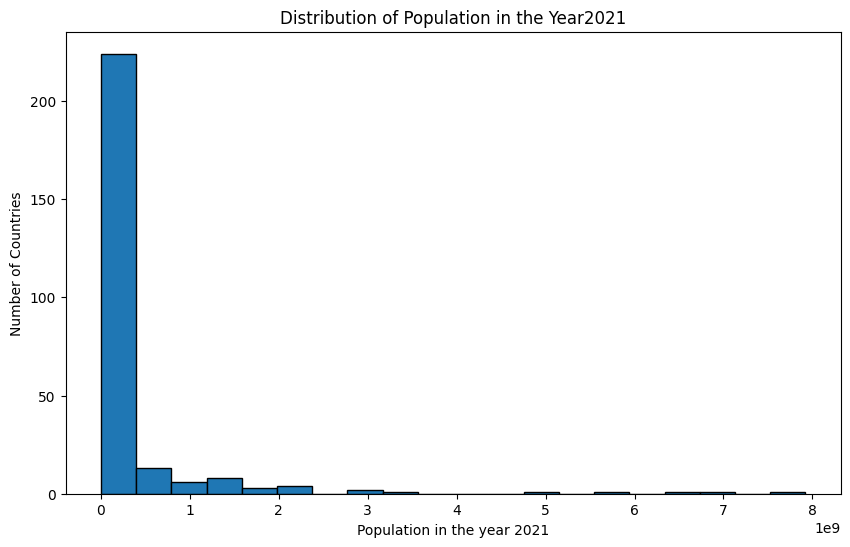

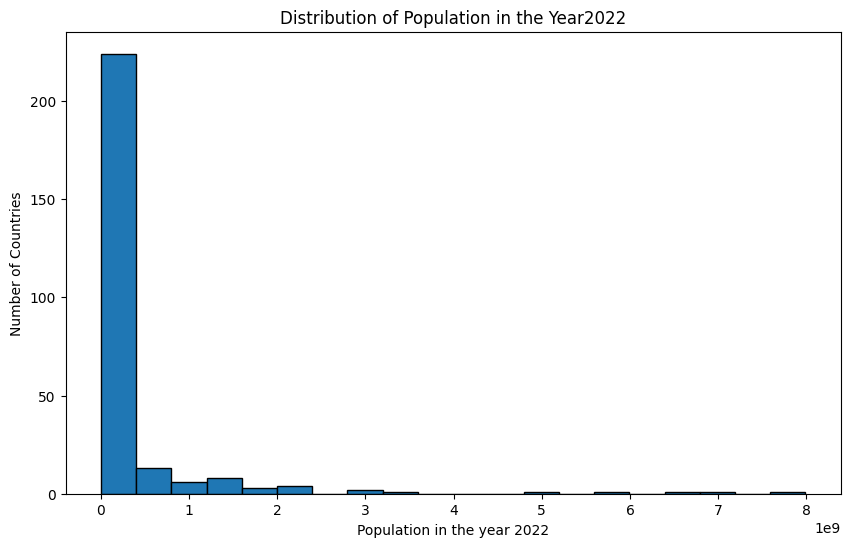

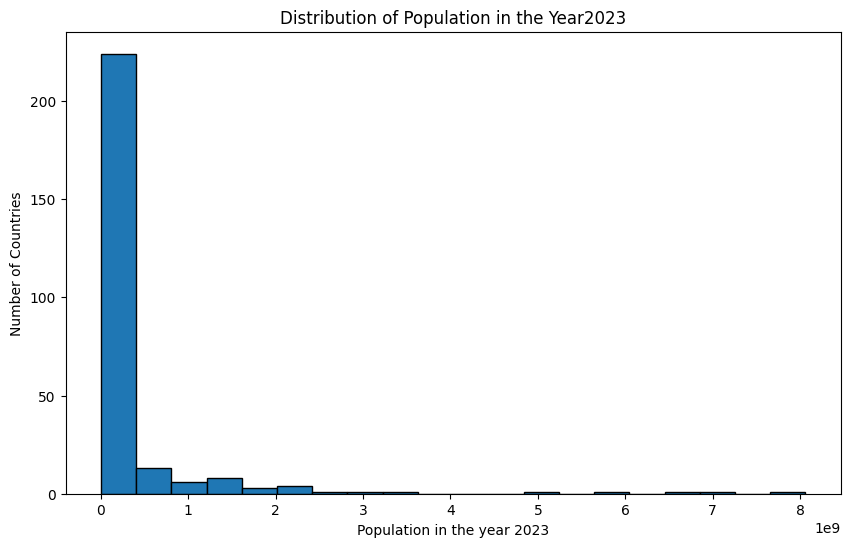

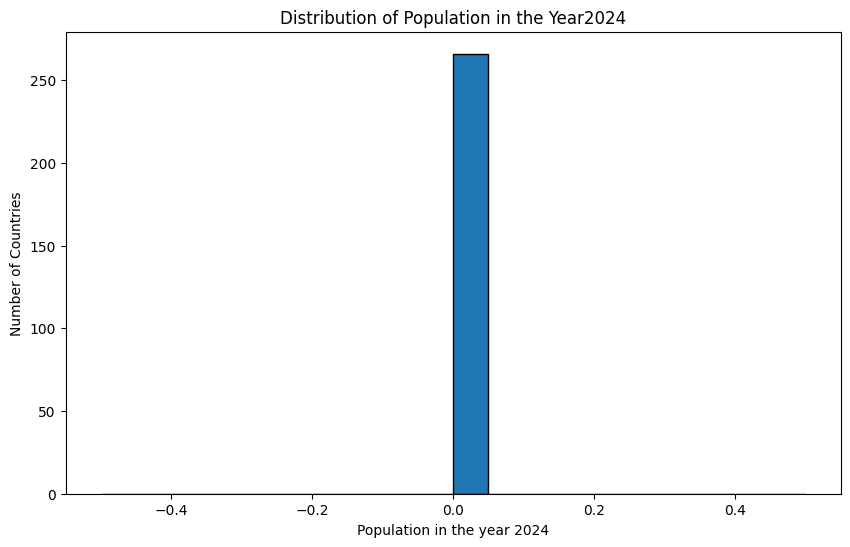

In [4]:
#Step 4: Let's take 2 variables:
#(i) X-Axis = Country Name
#(ii) Y-Axis = Country Population

#Let's create the histogram for every year.
import matplotlib.pyplot as plt

for i in years:
    population = data[['Country Name', i]]
    plt.figure(figsize=(10,6))
    plt.hist(population[i], bins=20, edgecolor='black')
    plt.xlabel(f'Population in the year {i}')
    plt.ylabel('Number of Countries')
    plt.title('Distribution of Population in the Year'+i)
    plt.show()

In [5]:
#Step 5: Now similarly let's make the bar chart

for i in years:
    population_bar= data[['Country Name', i]]
    plt.figure(figsize=(50,15))
    plt.bar(population_bar['Country Name'], population_bar[i])
    plt.xlabel('Name of the Country')
    plt.ylabel(f'Population in the year {i}')
    plt.title(f'Population of Countries in year {i}')
    plt.xticks(rotation=90)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.